# TP 4: Équation de transport en 1D

On s'intéresse à la résolution numérique de l'équation de la chaleur sur $[0,T]\times [0,1]$ avec une conductivité thermique $a\in \mathcal{C}^1([0,1]), a > 0$, et une source de chaleur continue, $f \in \mathcal{C}^0([0,1])$. On considèrera l'équation avec conditions périodiques:

$$
(T)\quad \left\{\begin{aligned}
&\frac{\partial u}{\partial t}(t,x) + c(x) \frac{\partial u}{\partial x}(t,x) = 0  \hbox{ sur } [0,1]\times ]0,T]\\
&u(t,0) = u(t,1) \hbox{ pour } t\in [0,T]\\
&u(0,\cdot) = u_0
\end{aligned}\right. 
$$


In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


## 1. Cas d'une vitesse constante
Soit $M$ le nombre de pas d'espace, $x_j = h j$ où $h=1/M$ et $0\leq j\leq M-1$. Par périodicité, on a $u(x_M) = u(x_0)$ et il est donc inutile d'encoder le dernier point. La discrétisation du temps est la même que d'habitude, c'est-à-dire
$t_n = n \tau$ où $\tau = T/N$ et $0\leq n\leq N$. On considère deux discrétisations possibles de l'opérateur $\partial/\partial x$:

$$ \mathrm{D}^+_h u_j = \frac{u_{j+1} - u_j}{h} \hbox{ et } \mathrm{D}^-_{h} u_j = \frac{u_{j} - u_{j-1}}{h}, $$

pour $0\leq j\leq M-1$, où l'on a posé implicitement $u^n_{M} = u^n_0$ et $u^n_{-1} = u^n_{M-1}$. Pour $c\geq 0$ on considère le schéma 

$$
\left\{\begin{aligned}
& u_j^{n+1} = u_n^n - c \tau \mathrm{D}^-_j u & \hbox{ pour } 1\leq j \leq M-1, 0\leq n \leq N-1 \\
& u_j^0 = u_0(x_j) & \hbox{ pour } 0\leq j\leq M-1\\
& u_M^n = u_0^n & \hbox{ pour } 0\leq n\leq N
\end{aligned}\right.
$$



**Q1)** Écrire une fonction DP(u,h) retournant le vecteur des dérivées discrètes à droite et DM(u,h) retournant le vecteur des dérivées discrètes à gauche (ne pas hésiter à s'aider de la fonction np.roll). 

In [3]:
def DM(u,h):
    return (u-np.roll(u,1))/h

def DP(u,h):
    return (np.roll(u,-1)-u)/h

**Q2)** Comparer numériquement les schémas décentrés avec $\mathrm{D}_h^-$ et $\mathrm{D}_h^+$ (tester en particulier l'instablité inconditionnelle du schéma décentré aval).

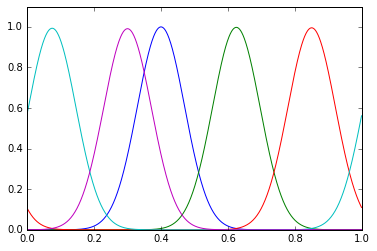

In [4]:
c = 1.0
M = 1000
h = 1.0/M
x = np.linspace(0,1-h,M)
u = np.exp(-100.0*np.power(x-.4,2))
N = 1000
tau = .9/N

for i in xrange(N+1):
    if i%(N/4)==0:
        plt.plot(x,u)
        plt.axis([0, 1., 0., 1.1])
    u = u - c * tau * DM(u,h)

**Q3)** Constater la forte diffusion numérique induite par le schéma lorsque $|c|\frac{\tau}{h} \ll 1$.

CFL=0.040000


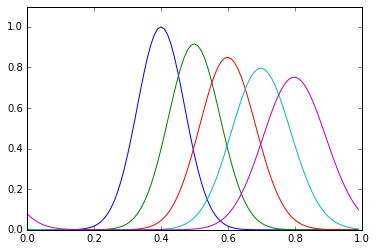

In [8]:
c = 1.0
M = 100
h = 1.0/M
x = np.linspace(0,1-h,M)
u = np.exp(-100.0*np.power(x-.4,2))
N = 1000
tau = .4/N
print("CFL=%f" % (np.abs(c)*tau/h))

for i in xrange(N+1):
    if i%(N/4)==0:
        plt.plot(x,u)
        plt.axis([0, 1., 0., 1.1])
    u = u - c * tau * DM(u,h)
plt.show()


**Q4)** Considérer le schéma décentré amont d'ordre deux, construit en posant

$$\mathrm{D}^{-,2}_{h} u_j = \frac{3u_{j} - 4u_{j-1} + u_{j-2}}{2h} \qquad \mathrm{D}^{+,2}_{h} u_j = \frac{-3u_{j} + 4u_{j+1} - u_{j+2}}{2h}$$

Si $c \geq 1$ on posera par exemple

$$ u_j^{n+1} = u_j^n + \tau \mathrm{D}_h^{-,2} u_j $$

Étudier la consistance ce schéma, calculer son ordre. Comparer numériquement au schéma d'ordre 1 (via une fonction DM2(u,h)).

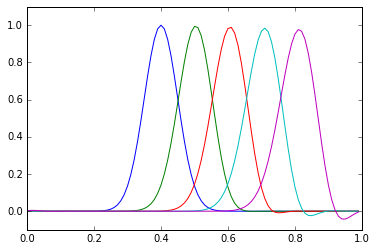

In [9]:
def DM2(u,h):
    return (3.0*u-4.0*np.roll(u,1)+np.roll(u,2))/(2.0*h)
def DP2(u,h):
    return (-3.0*u+4.0*np.roll(u,-1)-np.roll(u,-2))/(2.0*h)

u = np.exp(-200.0*np.power(x-.4,2))
c = 1.0
for i in xrange(N+1):
    if i%(N/4)==0:
        plt.plot(x,u)
        plt.axis([0, 1., -0.1, 1.1])
    u = u - c * tau * DM2(u,h)


## 2. Cas d'une vitesse variables

Dans le cas d'une vitesse variable, le choix de la dérivée discrète (à droite ou à gauche) choisie en un point $x_j$ va dépendre de $c_j := c(x_j)$. Précisément, 

$$ u_j^{n+1} = 
\begin{cases}
u_j^n + \tau \mathrm{D}_h^- u_j &\hbox{ si  } c_j \geq 0 
u_j^n + \tau \mathrm{D}_h^+ u_j &\hbox{ si  } c_j < 0,
\end{cases}$$

ce qu'on peut mettre sous la forme compacte (et propice aux calculs: on peut extraire $\min(c_j,0)$ via np.maximum(c,0) où $c$ est le vecteur des vitesses)

$$ u_j^{n+1} = u_j^n + \max(c_j,0) \mathrm{D}_h^- u_j + \min(c_j,0) \mathrm{D}_h^+ u_j. $$

**Q1)** Montrer que le schéma est stable en norme infinie sous la condition CFL $\|c\|_\infty \frac{\tau}{h} \leq 1$.

**Q2)** Montrer la consistance du schéma en une solution $u \in \mathcal{C}^1([0,T]\times [0,1])$ et périodique ($u(t,0) = u(t,1)$ et $u'(t,0) = u'(t,1)$ pour tout $t\in [0,T]$) de l'équation de transport.

**Q3)** Tester numériquement avec les données suivantes:

[0, 1.0, 0.0, 1.1]

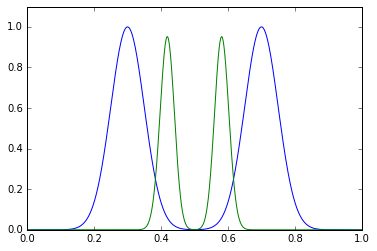

In [10]:
M = 1000
h = 1.0/M
x = np.linspace(0,1-h,M)
u = np.exp(-200.0*np.power(x-.3,2)) +  np.exp(-200.0*np.power(x-.7,2))
c = .5 - x #0.2 + .5*x*x
N = 1000
tau = .9/N

plt.plot(x,u)
for i in xrange(N):
    u = u - tau * (np.maximum(c,0) * DM(u,h) + np.minimum(c,0) * DP(u,h))
plt.plot(x,u)
plt.axis([0, 1., 0., 1.1])